In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df_deaths = pd.read_csv('RAW_us_deaths.csv')
df_cases = pd.read_csv('RAW_us_confirmed_cases.csv')
df_deaths2 = pd.read_csv('RAW_us_deaths.csv')

In [3]:
# problem 2 
# change the names of the Province_State and Admin2 columns to
# state and city respectively

rename_dict = {'Province_State': 'state',
               'Admin2': 'city'}

df_deaths = df_deaths.rename(columns=rename_dict)
df_cases = df_cases.rename(columns=rename_dict)
df_deaths2 = df_deaths2.rename(columns=rename_dict)

In [4]:
### problem 3: drop columns
drop_cols1 = ['UID','iso2','iso3','code3','FIPS','Country_Region','Lat','Long_','Combined_Key']
drop_cols2 = drop_cols1 + ['Population']

df_deaths = df_deaths.drop(columns=drop_cols2)
df_cases = df_cases.drop(columns=drop_cols1)

In [5]:
# problem 4: melt to long
# use drop and melt to create long format dataframe
# from each of df_deaths and df_cases that has the columns
# province_state, Admin2, date, and value

dth = df_deaths.melt(id_vars=['state', 'city'], var_name='date')
csc = df_cases.melt(id_vars=['state', 'city'], var_name='date')

In [6]:
df_deaths

,state,city,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21
0,Alabama,Autauga,0,0,0,0,0,0,0,0,...,55,55,55,55,61,61,62,62,62,65
1,Alabama,Baldwin,0,0,0,0,0,0,0,0,...,182,182,183,184,188,188,189,189,189,216
2,Alabama,Barbour,0,0,0,0,0,0,0,0,...,36,36,36,36,36,37,38,38,38,40
3,Alabama,Bibb,0,0,0,0,0,0,0,0,...,47,47,47,47,48,48,48,48,48,51
4,Alabama,Blount,0,0,0,0,0,0,0,0,...,83,83,83,83,86,86,86,86,86,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,Wyoming,Teton,0,0,0,0,0,0,0,0,...,4,4,5,5,5,5,5,5,5,6
3336,Wyoming,Uinta,0,0,0,0,0,0,0,0,...,9,9,10,10,10,12,12,12,12,12
3337,Wyoming,Unassigned,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3338,Wyoming,Washakie,0,0,0,0,0,0,0,0,...,23,23,24,24,24,25,25,25,25,25


In [7]:
# problem 5
# add a column to each dataframe that indicates whether the data correspond to a death
# or a case

dth['type'] = 'deaths'
csc['type'] = 'cases'

In [8]:
# problem 6

# concatenate the two dataframes

long = pd.concat([dth, csc])

# convert date from a string to a datetime object using pd.to_datetime()

long['date'] = pd.to_datetime(long['date'])

In [9]:
# problem 7
# aggregate the dataframe by state, date, and type
# calculate the total deaths and cases
# pivot the dataframe so it has the columns:
# state, date, deaths, and columns
# hint: reset the index after the groupby

piv = long.groupby(['state','date','type']).sum().reset_index()
piv = piv.pivot(index=['state', 'date'], columns='type', values='value')

In [10]:
# problem 8
# piv.groupby('state').shift(1) shifts the values down by 1 index 
# within each level of state, i.e., doesn't shift down the last date 
# for each state into first date of the following state
# and fills in the nan that appears on the first date with a zero
# taking the difference then convert the cumsum into the daily totals

piv2 = piv - piv.groupby('state').shift(1).fillna(0.0)

In [11]:
piv2

type                cases  deaths
state   date                     
Alabama 2020-01-22    0.0     0.0
        2020-01-23    0.0     0.0
        2020-01-24    0.0     0.0
        2020-01-25    0.0     0.0
        2020-01-26    0.0     0.0
...                   ...     ...
Wyoming 2021-01-22  159.0    21.0
        2021-01-23    0.0     0.0
        2021-01-24  315.0     0.0
        2021-01-25  164.0     0.0
        2021-01-26   90.0    25.0

[21518 rows x 2 columns]

In [12]:
# problem 9
# find the deadliest date and date with the most cases for each state

extract_first = lambda x: x[0]

max_date = piv2.groupby('state').idxmax()
for i in max_date.columns:
    max_date[i] = max_date[i].apply(extract_first)

In [13]:
#  problem 10 : use the original df deaths dataframe to calculate the total population of each state
# join this with piv to find the state with the greatest amount of deaths per capita for every date

df_pop = df_deaths2.groupby(['state'])['Population'].sum()
df_percap = piv2.join(df_pop, on='state')
df_percap['Deaths Per Capita'] = df_percap['deaths'] / df_percap['Population']
max_percap = df_percap.groupby('date').idxmax()['Deaths Per Capita'].apply(extract_first)

In [14]:
tmp = df_percap['deaths'].astype('int64') / df_percap['Population'].astype('int64')
tmp.loc['Grand Princess'].max()

inf

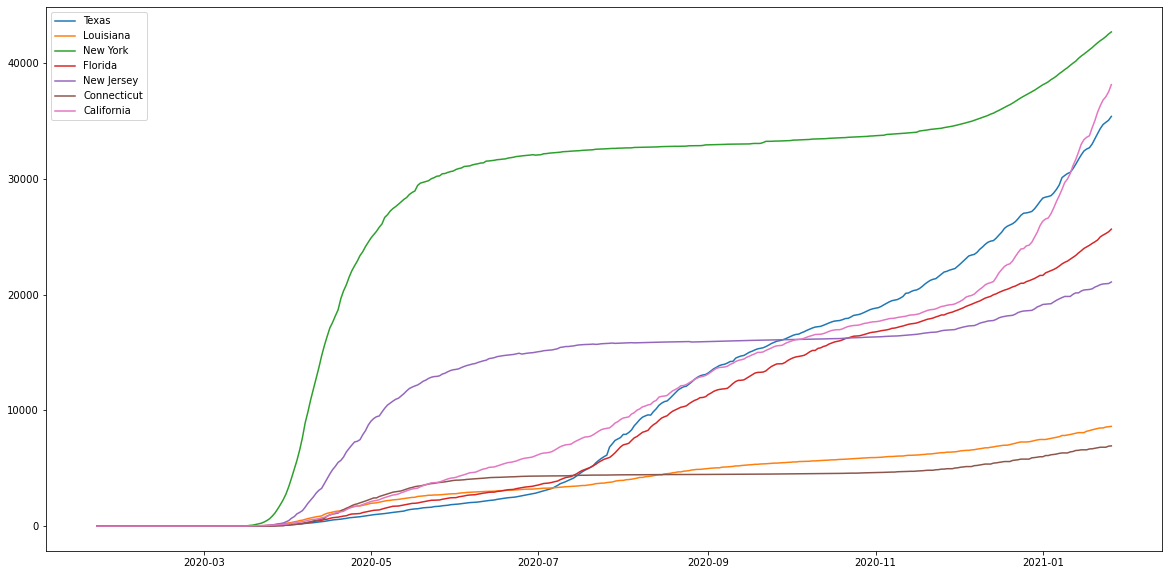

In [15]:
# problem 11: make a lineplot for the cumulative deaths of the following states:

states = ['Texas', 'Louisiana', 'New York', 'Florida', 'New Jersey', 'Connecticut', 'California']

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
for state in states:
    ax.plot(piv.loc[state, 'deaths'], label=state)

ax.legend()

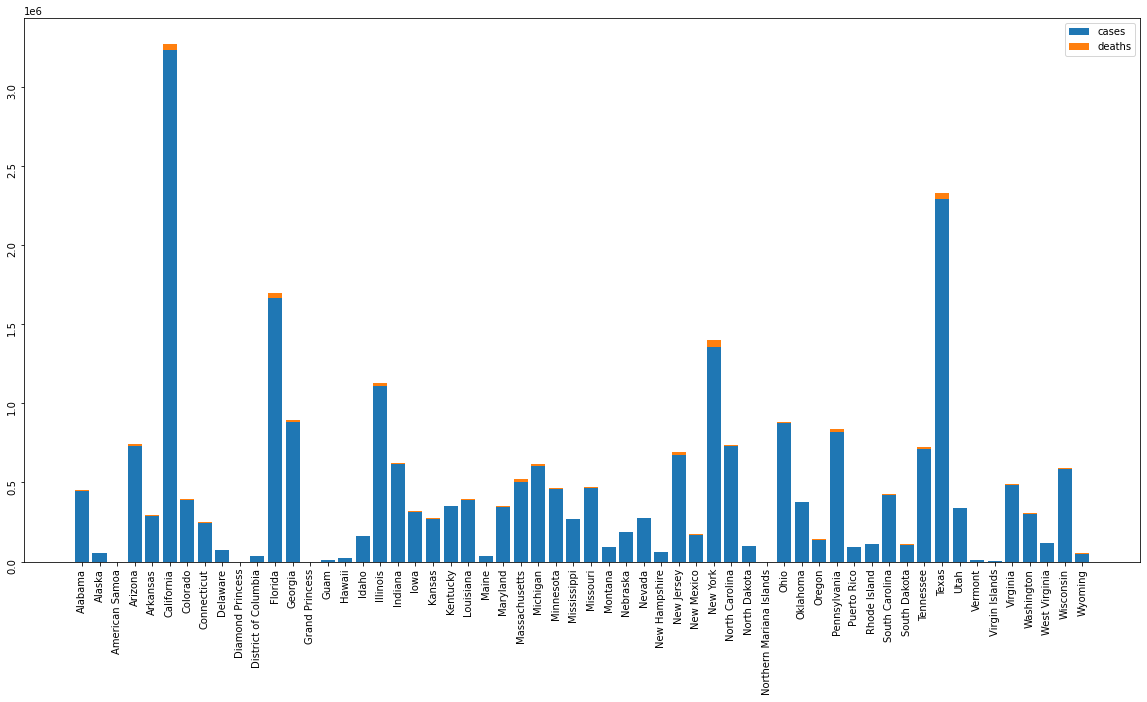

In [25]:
# problem 12

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)

total_sums = piv2.groupby('state').sum()
ax.tick_params(rotation=90)
ax.bar(x=total_sums.index, height=total_sums['cases'], label='cases')
ax.bar(x=total_sums.index, height=total_sums['deaths'], bottom=total_sums['cases'], label='deaths')
ax.legend()

(<Figure size 1080x1080 with 49 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

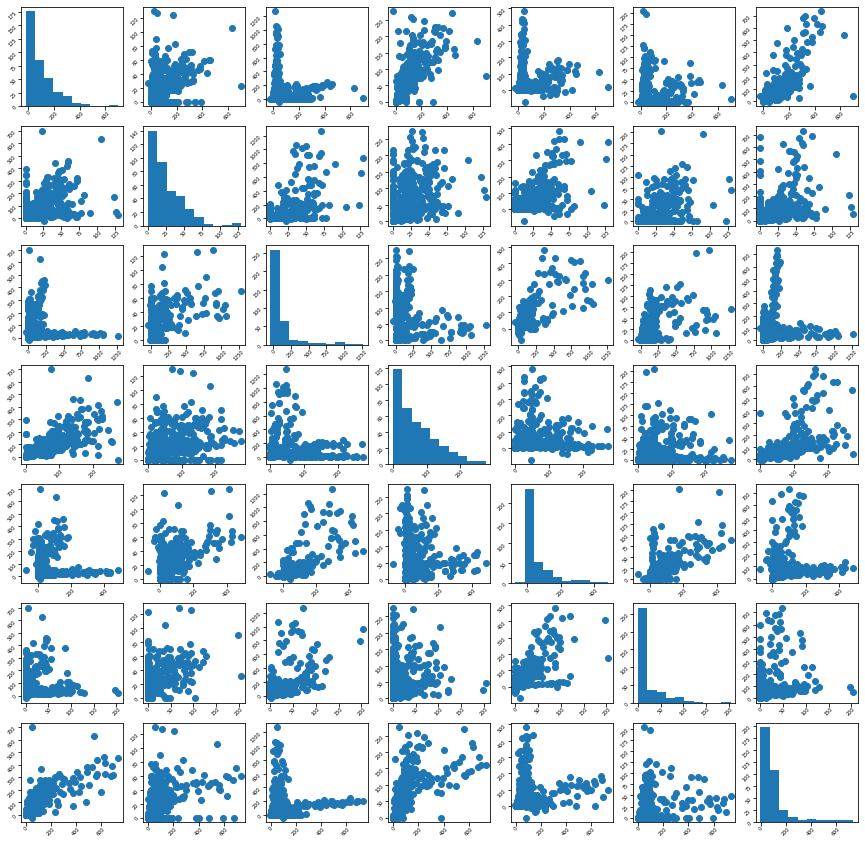

In [17]:
# exercise 13

def make_pairplot(df):
    n = len(df.columns)
    fig, ax = plt.subplots(n,n,figsize=(15,15))
    for i, col1 in enumerate(df.columns):
        for j, col2 in enumerate(df.columns):
            ax[i,j].tick_params(labelrotation=45, pad=0, labelsize=5)
            if i==j:
                ax[i, j].hist(df[col1])
            else:
                ax[i, j].scatter(df[col1], df[col2])
            
    return fig, ax

piv3 = piv2.reset_index().pivot(index='date', columns='state', values='deaths')
piv3 = piv3[states]

make_pairplot(piv3)

In [18]:
piv.loc['Alabama'].loc['2021-01-10':] - piv.loc['Alabama'].loc['2021-01-10':]

type,cases,deaths
date,,
2021-01-10,0,0
2021-01-11,0,0
2021-01-12,0,0
2021-01-13,0,0
2021-01-14,0,0
2021-01-15,0,0
2021-01-16,0,0
2021-01-17,0,0
2021-01-18,0,0


In [19]:
piv.loc[['Alabama', 'Alaska']].iloc[365:380].groupby('state').shift(1)

type                   cases  deaths
state   date                        
Alabama 2021-01-21       NaN     NaN
        2021-01-22  432536.0  6379.0
        2021-01-23  436087.0  6486.0
        2021-01-24  439442.0  6657.0
        2021-01-25  441170.0  6660.0
        2021-01-26  443009.0  6662.0
Alaska  2020-01-22       NaN     NaN
        2020-01-23       0.0     0.0
        2020-01-24       0.0     0.0
        2020-01-25       0.0     0.0
        2020-01-26       0.0     0.0
        2020-01-27       0.0     0.0
        2020-01-28       0.0     0.0
        2020-01-29       0.0     0.0
        2020-01-30       0.0     0.0

In [20]:
import pandas as pd
cases=pd.read_csv("RAW_us_confirmed_cases.csv")
deaths=pd.read_csv("RAW_us_deaths.csv")

cases = cases.rename(columns={'Province_State': 'state', 'Admin2': 'city'})
deaths = deaths.rename(columns={'Province_State': 'state', 'Admin2': 'city'})


cases_w_dates = cases.drop(columns=[ 'UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
deaths_w_dates = deaths.drop(columns=[ 'UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'])


cases_long = cases_w_dates.reset_index().melt(id_vars=['state', 'city'])
deaths_long = deaths_w_dates.reset_index().melt(id_vars=['state', 'city'])


cases["type"] = "cases"
deaths["types"] = "cases"
cases

,state,city,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,type
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,5198,5227,5257,5270,5327,5358,5376,5407,5440,cases
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,16346,16513,16653,16798,16981,17128,17256,17333,17496,cases
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,1730,1738,1760,1778,1793,1805,1827,1834,1882,cases
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,2162,2170,2188,2198,2212,2223,2223,2229,2247,cases
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,5308,5320,5376,5411,5439,5462,5473,5485,5517,cases
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,Wyoming,Teton,84056039,US,USA,840,56039.0,US,43.935225,-110.589080,...,2753,2769,2788,2847,2870,2870,2931,2981,2993,cases
3336,Wyoming,Uinta,84056041,US,USA,840,56041.0,US,41.287818,-110.547578,...,1833,1843,1852,1874,1887,1887,1900,1913,1925,cases
3337,Wyoming,Unassigned,84090056,US,USA,840,90056.0,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,cases
3338,Wyoming,Washakie,84056043,US,USA,840,56043.0,US,43.904516,-107.680187,...,844,846,846,848,853,853,858,861,863,cases


In [21]:
cases= cases.rename(columns={'Province_State': 'state', 'Admin2': 'city'})
cases = cases.groupby(['state', 'city']).sum()

deaths = deaths.rename(columns={'Province_State': 'state', 'Admin2': 'city'})
deaths = deaths.groupby(['state', 'city']).sum()

In [22]:
cases=pd.read_csv("RAW_us_confirmed_cases.csv")
deaths=pd.read_csv("RAW_us_deaths.csv")

cases = cases.rename(columns={'Province_State': 'state', 'Admin2': 'city'})
cases = cases.groupby(['state', 'city']).sum()

deaths = deaths.rename(columns={'Province_State': 'state', 'Admin2': 'city'})
deaths = deaths.groupby(['state', 'city']).sum()

In [23]:
cases

UID  code3     FIPS        Lat       Long_  1/22/20  \
state   city                                                                   
Alabama Autauga     84001001    840   1001.0  32.539527  -86.644082        0   
        Baldwin     84001003    840   1003.0  30.727750  -87.722071        0   
        Barbour     84001005    840   1005.0  31.868263  -85.387129        0   
        Bibb        84001007    840   1007.0  32.996421  -87.125115        0   
        Blount      84001009    840   1009.0  33.982109  -86.567906        0   
...                      ...    ...      ...        ...         ...      ...   
Wyoming Teton       84056039    840  56039.0  43.935225 -110.589080        0   
        Uinta       84056041    840  56041.0  41.287818 -110.547578        0   
        Unassigned  84090056    840  90056.0   0.000000    0.000000        0   
        Washakie    84056043    840  56043.0  43.904516 -107.680187        0   
        Weston      84056045    840  56045.0  43.839612 -104.567488        0   

                    1/23/20  1/24/20  1/25/20  1/26/20  ...  1/17/21  1/18/21  \
state   city                                            ...                     
Alabama Autauga           0        0        0        0  ...     5184     5198   
        Baldwin           0        0        0        0  ...    16251    16346   
        Barbour           0        0        0        0  ...     1729     1730   
        Bibb              0        0        0        0  ...     2151     2162   
        Blount            0        0        0        0  ...     5304     5308   
...                     ...      ...      ...      ...  ...      ...      ...   
Wyoming Teton             0        0        0        0  ...     2685     2753   
        Uinta             0        0        0        0  ...     1817     1833   
        Unassigned        0        0        0        0  ...        0        0   
        Washakie          0        0        0        0  ...      843      844   
        Weston            0        0        0        0  ...      602      602   

                    1/19/21  1/20/21  1/21/21  1/22/21  1/23/21  1/24/21  \
state   city                                                               
Alabama Autauga        5227     5257     5270     5327     5358     5376   
        Baldwin       16513    16653    16798    16981    17128    17256   
        Barbour        1738     1760     1778     1793     1805     1827   
        Bibb           2170     2188     2198     2212     2223     2223   
        Blount         5320     5376     5411     5439     5462     5473   
...                     ...      ...      ...      ...      ...      ...   
Wyoming Teton          2769     2788     2847     2870     2870     2931   
        Uinta          1843     1852     1874     1887     1887     1900   
        Unassigned        0        0        0        0        0        0   
        Washakie        846      846      848      853      853      858   
        Weston          606      606      609      609      609      610   

                    1/25/21  1/26/21  
state   city                          
Alabama Autauga        5407     5440  
        Baldwin       17333    17496  
        Barbour        1834     1882  
        Bibb           2229     2247  
        Blount         5485     5517  
...                     ...      ...  
Wyoming Teton          2981     2993  
        Uinta          1913     1925  
        Unassigned        0        0  
        Washakie        861      863  
        Weston          610      609  

[3334 rows x 376 columns]